In [34]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [35]:
dataset_path = '/content/drive/MyDrive/Dataset/5Animals'

idg = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  #درجه
    zoom_range=0.1,   #درصد
    horizontal_flip=True,
    validation_split=0.1
)

dataset_train = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    # save_to_dir='/content/drive/MyDrive/Dataset/Animal_test',  
    subset='training',
    target_size=(224, 224) 
)

dataset_validation = idg.flow_from_directory(
    dataset_path,
    shuffle=False,
    subset='validation',
    target_size=(224, 224)  
)

Found 1171 images belonging to 5 classes.
Found 128 images belonging to 5 classes.


In [36]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), strides=(2, 2), activation="relu", padding="same", input_shape=(224, 224, 3)), #ورودی شبکه باید 224*224 باشد
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), strides=(1, 1), activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), strides=(1, 1), activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(512, activation="relu"),
    layers.Dense(5, activation="softmax"),
])

In [ ]:
model.summary()  

In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )

In [38]:
history = model.fit(dataset_train, 
                    validation_data=dataset_validation,  
                    epochs=20)

Epoch 1/20
37/37 [==============================] - 66s 2s/step - loss: 1.6260 - accuracy: 0.2886 - val_loss: 1.4572 - val_accuracy: 0.3906
Epoch 2/20
37/37 [==============================] - 60s 2s/step - loss: 1.3190 - accuracy: 0.4509 - val_loss: 1.2760 - val_accuracy: 0.4531
Epoch 3/20
37/37 [==============================] - 59s 2s/step - loss: 1.2225 - accuracy: 0.4927 - val_loss: 1.3705 - val_accuracy: 0.4062
Epoch 4/20
37/37 [==============================] - 62s 2s/step - loss: 1.0640 - accuracy: 0.5679 - val_loss: 1.1152 - val_accuracy: 0.5391
Epoch 5/20
37/37 [==============================] - 60s 2s/step - loss: 0.9403 - accuracy: 0.6149 - val_loss: 1.1546 - val_accuracy: 0.5391
Epoch 6/20
37/37 [==============================] - 61s 2s/step - loss: 0.8568 - accuracy: 0.6652 - val_loss: 1.1379 - val_accuracy: 0.5156
Epoch 7/20
37/37 [==============================] - 62s 2s/step - loss: 0.7621 - accuracy: 0.7054 - val_loss: 1.0652 - val_accuracy: 0.6172
Epoch 8/20
37/37 [==

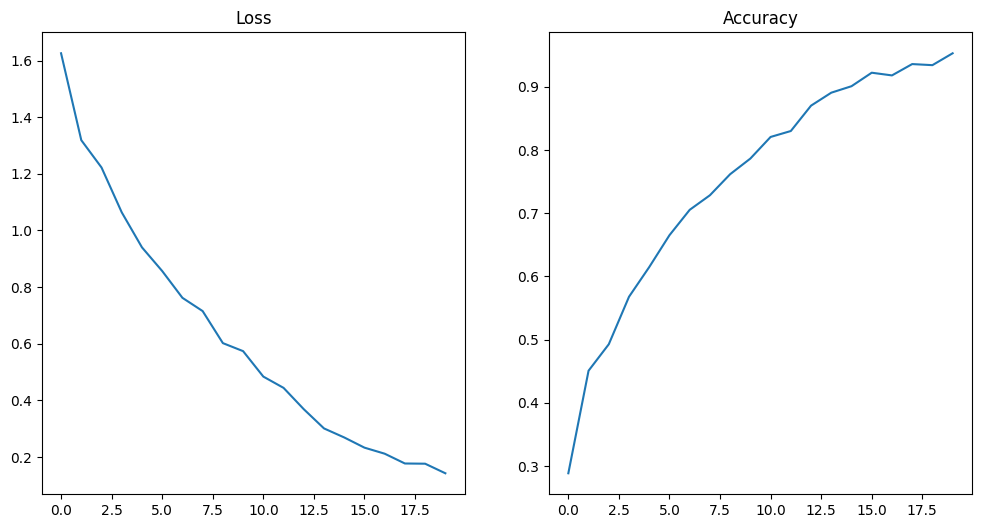

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(history.history['loss'])
ax1.set_title("Loss")
ax2.plot(history.history['accuracy'])
ax2.set_title("Accuracy")
plt.show()

In [40]:
prediction_data = model.predict(dataset_validation)

4/4 [==============================] - 3s 797ms/step


In [41]:
predictions = np.argmax(prediction_data, axis=1)


In [42]:
confusion_matrix = confusion_matrix(dataset_validation.classes, predictions)
confusion_matrix


array([[14,  9,  1,  1,  3],
       [ 7, 18,  3,  1,  2],
       [ 4,  2, 15,  0,  0],
       [ 3,  4,  3, 12,  0],
       [ 3,  2,  3,  0, 18]])

In [43]:
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4])

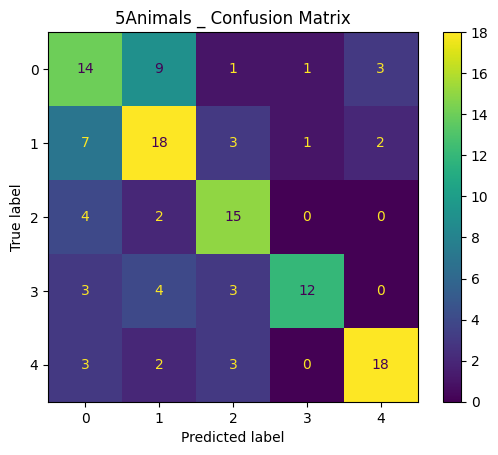

In [44]:
confusion_matrix_display.plot()
plt.title("5Animals _ Confusion Matrix")
plt.show()

In [55]:
image = cv2.imread("/content/drive/MyDrive/Assets/giraffe.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image , (224, 224))
image = image // 255.0
image = image.reshape(1, 224, 224, 3)
result = model.predict(image)
predicted_class = np.argmax(result)

1/1 [==============================] - 0s 28ms/step


In [56]:
if predicted_class == 0:
    print("🐈")
elif predicted_class == 1:
    print("🐶")
elif predicted_class == 2:
    print("🐘")
elif predicted_class == 3:
    print("🦒")
elif predicted_class == 4:
    print("🐼")

🦒
